In [149]:
from typing import List
import random
from Vector_operations_on_data import distance,add,scalar_multiply,vector_mean #Importing functions from the previous code
from typing import Callable

Vector = List[float]

In [150]:
"""
##########################################################################################################
##########################    Calling function if f is a function of one variable   ######################
##########################################################################################################
"""
# Callable function : square
def square(x:float) -> float:
    return x*x

# Derivative of a square function
def derivative(x:float) -> float:
    return 2*x

# Estimating solution of a derivative function
def difference_quotient(f: Callable[[float],float], x: float,h: float)-> float:
    return (f(x+h) -f(x))/h

In [151]:
xs = [x for x in range(-10,11)]
actuals = [derivative(x) for x in xs] # Get actual values in xs using derivative function
print(xs)
print(actuals)

# Get estimates of the derivative function using difference_quotient
estimates = [difference_quotient(square, x,h = 0.001) for x in xs]
print(estimates)

[-10, -9, -8, -7, -6, -5, -4, -3, -2, -1, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
[-20, -18, -16, -14, -12, -10, -8, -6, -4, -2, 0, 2, 4, 6, 8, 10, 12, 14, 16, 18, 20]
[-19.998999999984335, -17.998999999988996, -15.999000000007868, -13.999000000005424, -11.99900000000298, -9.999000000004088, -7.998999999999867, -5.998999999999199, -3.9989999999994197, -1.998999999999973, 0.001, 2.0009999999996975, 4.000999999999699, 6.000999999999479, 8.0010000000037, 10.001000000002591, 12.001000000005035, 14.00100000000748, 16.000999999988608, 18.000999999983947, 20.000999999993496]


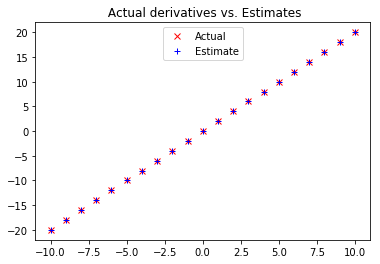

In [152]:
#Plotting to see if actual derivative values of a square function matches with the estimated values
import matplotlib.pyplot as plt
plt.title(" Actual derivatives vs. Estimates")
plt.plot(xs,actuals,'rx',label = 'Actual')
plt.plot(xs,estimates,'b+',label = 'Estimate')
plt.legend(loc = 9)
plt.show()

In [153]:
"""
##########################################################################################################
##########################    Calling function if f is a function of many variables ######################
##########################################################################################################
"""
# Partial derivatives, f is a function of many variables
def partial_difference_quotient(f: Callable[[Vector],float],v:Vector, i:int,h:float)-> float:
    #Returns the ith partial difference quotient of f at v
    w = [v_j + (h if j ==i else 0) 
        for j,v_j in enumerate(v)]
    
    return (f(w)-f(v))/h

In [154]:
def estimate_gradient(f: Callable[[Vector],float],v:Vector,h:float = 0.0001)-> float:
    return [partial_difference_quotient(f,v,i,h)
           for i in range(len(v))]

In [155]:
def gradient_step (v:Vector, gradient:Vector,step_size:float) -> Vector:
    assert len(v) == len(gradient)
    step = scalar_multiply(step_size,gradient)
    return add(v,step)

In [156]:
def sum_of_squares_gradient(v:Vector)-> Vector:
    return [2*v_i for v_i in v]

In [157]:
# Pick a random starting point to find minimum in a 3D vector
# Take tiny steps in the opposite of gradient until we reach a point where gradient is very small
v = [random.uniform(-10,10) for i in range(3)]

for epoch in range(1000):
    grad = sum_of_squares_gradient(v)
    v = gradient_step(v,grad,-0.01)
    print(epoch,v)
    
assert distance(v,[0,0,0])<0.001 # v should be close to 0

0 [1.166334200246083, 1.3875788778188547, 2.8171214624252365]
1 [1.1430075162411613, 1.3598273002624777, 2.760779033176732]
2 [1.1201473659163381, 1.3326307542572282, 2.7055634525131973]
3 [1.0977444185980114, 1.3059781391720837, 2.651452183462933]
4 [1.0757895302260512, 1.279858576388642, 2.5984231397936743]
5 [1.05427373962153, 1.2542614048608693, 2.5464546769978007]
6 [1.0331882648290995, 1.229176176763652, 2.4955255834578445]
7 [1.0125244995325176, 1.204592653228379, 2.4456150717886875]
8 [0.9922740095418672, 1.1805008001638115, 2.396702770352914]
9 [0.9724285293510299, 1.1568907841605354, 2.3487687149458556]
10 [0.9529799587640093, 1.1337529684773247, 2.3017933406469386]
989 [2.4513869536651658e-09, 2.916396310378981e-09, 5.920991426318714e-09]
990 [2.4023592145918623e-09, 2.858068384171401e-09, 5.80257159779234e-09]
991 [2.354312030300025e-09, 2.800907016487973e-09, 5.6865201658364936e-09]
992 [2.3072257896940244e-09, 2.7448888761582134e-09, 5.572789762519764e-09]
993 [2.26108127

In [158]:
"""
##########################################################################################################
##########################            Use gradient descent to fit models            ######################
##########################                   Batch gradient descent                  ######################
##########################################################################################################
"""
# x ranges from -50 to 49, y is always 20*x+5
inputs = [(x,20*x+5) for x in range(-50,50)]
print(inputs)

[(-50, -995), (-49, -975), (-48, -955), (-47, -935), (-46, -915), (-45, -895), (-44, -875), (-43, -855), (-42, -835), (-41, -815), (-40, -795), (-39, -775), (-38, -755), (-37, -735), (-36, -715), (-35, -695), (-34, -675), (-33, -655), (-32, -635), (-31, -615), (-30, -595), (-29, -575), (-28, -555), (-27, -535), (-26, -515), (-25, -495), (-24, -475), (-23, -455), (-22, -435), (-21, -415), (-20, -395), (-19, -375), (-18, -355), (-17, -335), (-16, -315), (-15, -295), (-14, -275), (-13, -255), (-12, -235), (-11, -215), (-10, -195), (-9, -175), (-8, -155), (-7, -135), (-6, -115), (-5, -95), (-4, -75), (-3, -55), (-2, -35), (-1, -15), (0, 5), (1, 25), (2, 45), (3, 65), (4, 85), (5, 105), (6, 125), (7, 145), (8, 165), (9, 185), (10, 205), (11, 225), (12, 245), (13, 265), (14, 285), (15, 305), (16, 325), (17, 345), (18, 365), (19, 385), (20, 405), (21, 425), (22, 445), (23, 465), (24, 485), (25, 505), (26, 525), (27, 545), (28, 565), (29, 585), (30, 605), (31, 625), (32, 645), (33, 665), (34, 

In [159]:
def linear_gradient(x:float,y:float,theta:Vector)-> Vector:
    slope,intercept = theta
    predicted = slope*x+intercept # The prediction of the model
    error = (predicted - y) #error is predicted - actual
    squared_error = error**2 #Minime the squared error
    grad = [2*error*x,2*error]
    return grad

In [160]:
# Start with random values for slope and intercept
theta = [random.uniform(-1,1), random.uniform(-1,1)]
theta

[-0.4215732004032178, -0.5297549553127789]

In [161]:
learning_rate = 0.001
for epoch in range(5000):
    #Compute the mean of the gradients
    grad = vector_mean([linear_gradient(x,y,theta) for x,y in inputs])
    # Take a step in that direction
    theta = gradient_step(theta, grad,-learning_rate)
    print(epoch, theta)
    
slope, intercept = theta
assert 19.9 < slope < 20.1 # Slope should be around 20
assert 4.9 < intercept < 5.1 # Intercept should be around 5


0 [33.61565956971364, -0.5391170186025565]
1 [10.912815949982392, -0.5144231249956376]
2 [26.05563733823675, -0.5124814627956639]
3 [15.955377413933293, -0.4954008625318358]
4 [22.692267864043963, -0.4884546833928388]
5 [18.198768879999285, -0.47478550616200915]
6 [21.195946371534315, -0.4656371662696859]
7 [19.196838133020343, -0.45350994556561225]
8 [20.530255455329865, -0.44340608754146066]
9 [19.640876205207437, -0.4319890199110479]
10 [20.234103582106727, -0.4214841656660184]
4991 [19.999999847517373, 4.999746116334068]
4992 [19.999999847822245, 4.999746623948917]
4993 [19.99999984812651, 4.999747130548841]
4994 [19.999999848430168, 4.99974763613587]
4995 [19.999999848733214, 4.999748140712029]
4996 [19.999999849035657, 4.999748644279338]
4997 [19.999999849337495, 4.9997491468398145]
4998 [19.99999984963873, 4.999749648395472]
4999 [19.999999849939364, 4.99975014894832]


In [89]:
"""
##########################################################################################################
################# Split data into mini-batches and use gradient descent to fit models ####################
##########################################################################################################
"""

from typing import TypeVar, List, Iterator
T = TypeVar('T')

def minibatches(dataset:List[T],
               batch_size = int,
               shuffle:bool = True) -> Iterator[List[T]]:
    # Generate minibatches of batchsize from the datset
    #Index starts from 0
    batch_starts = [start for start in range(0, len(dataset), batch_size)]

    
    if shuffle:random.shuffle(batch_starts) #Shuffle the batches
    
    for start in batch_starts:
        end = start+batch_size
        yield dataset[start:end]
        
        

In [90]:
theta = [random.uniform(-1,1), random.uniform(-1,1)]

for epoch in range(1000):
    for batch in minibatches(inputs, batch_size = 20):
        grad = vector_mean([linear_gradient(x,y,theta) for x,y in batch])
        theta = gradient_step(theta, grad, -learning_rate)
    print (epoch,theta)
    
slope, intercept = theta
assert 19.9 < slope < 20.1 # Slope should be around 20
assert 4.9 < intercept < 5.1 # Intercept should be around 5


0 [18.517363091241375, 1.7808560846726924]
1 [19.699215613372097, 1.7732172258020102]
2 [19.826391913707262, 1.7980870181560493]
3 [19.48892269786346, 1.8800017146711103]
4 [20.04733763448632, 1.9420861785308678]
5 [20.007296853146265, 2.0827023199173986]
6 [18.672826497211233, 2.1625850862728107]
7 [19.623924592910804, 2.1459358736419345]
8 [19.96905351118571, 2.2569009292039874]
9 [20.09316990959831, 2.292167887918438]
10 [20.110381781360438, 2.3024839443778062]
990 [19.999999759400822, 4.999997598267602]
991 [19.99999962804993, 4.999997677823221]
992 [19.999999883415278, 4.9999978945921]
993 [20.00000013806604, 4.999997903377837]
994 [19.99999988532921, 4.999997910890041]
995 [20.000000063432054, 4.9999979561903745]
996 [19.999999515488472, 4.999997983223836]
997 [19.99999998365643, 4.999997997537947]
998 [20.00000001870291, 4.999998009899814]
999 [20.000000097181715, 4.999998018242733]


In [162]:
"""
##########################################################################################################
####    Use Stochastic gradient descent in which you take gradient steps based on one training example ###
##########################################################################################################
"""

theta = [random.uniform(-1,1), random.uniform(-1,1)]

for epoch in range(1000):
    for x,y in inputs:
        grad = linear_gradient(x,y,theta)
        theta = gradient_step(theta, grad, -learning_rate)
    print (epoch,theta)
    
slope, intercept = theta
assert 19.9 < slope < 20.1 # Slope should be around 20
assert 4.9 < intercept < 5.1 # Intercept should be around 5

0 [20.102302671939782, -0.09181704665302065]
1 [20.09791283387859, 0.12664107806112238]
2 [20.09371200518361, 0.33572651405147924]
3 [20.089691391575222, 0.535841397726443]
4 [20.08584330286927, 0.7273705997826726]
5 [20.082160308586428, 0.910682478672682]
6 [20.078635328405888, 1.0861295884243798]
7 [20.07526155745144, 1.254049356687741]
8 [20.072032565816414, 1.4147647349173262]
9 [20.06894209317885, 1.568584818791328]
10 [20.06598421945285, 1.7158054422036888]
990 [20.000000002709324, 5.000000000324199]
991 [20.000000002326704, 5.000000000408773]
992 [20.00000001005339, 5.000000000639604]
993 [20.00000000019266, 5.000000000805643]
994 [19.99999999263345, 5.000000000625624]
995 [19.999999986186552, 5.000000000180019]
996 [19.99999999802444, 4.999999999872501]
997 [19.999999993008544, 4.999999999698645]
998 [19.999999991369503, 4.99999999940447]
999 [20.000000003838124, 4.9999999993452455]
